### 导入库
顺便定义些常量

In [1]:
from helper import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


### 读取图片数据到内存

In [2]:
for i in tqdm(range(n)):
    data = cv2.imread(images_path[i])
    shape = data.shape[:2]
    shapes[i] = shape
    X[i] = cv2.resize(data, (width, width))

100%|██████████| 1000/1000 [00:02<00:00, 394.27it/s]


### ConvNet-19
使用这个卷积神经网络训练数据

In [3]:
def catDogNet():
    model_ = Sequential()

    model_.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model_.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Flatten())
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(n_class))
    model_.add(Activation(last_activate))
    return model_

### ConvNet-19
with early stopping

In [4]:
model_conv = catDogNet()
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 299, 299, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 149, 149, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 128)       73856     
__________

In [5]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

In [6]:
model_conv.compile(optimizer=RMSprop(lr=lr), loss=loss_function, metrics=['accuracy'])
h = model_conv.fit(x=X, y=y, batch_size=32, epochs=20, validation_split=0.25, verbose=0, shuffle=True, callbacks=[LossHistory(), earlyStopping])

{'loss': 1.2090971511205038, 'val_loss': 0.68906227397918696, 'val_acc': 0.57199999999999995, 'acc': 0.48933333341280622}
{'loss': 1.0246187807718912, 'val_loss': 0.70640426731109618, 'val_acc': 0.5359999995231628, 'acc': 0.50933333317438756}
{'loss': 0.91477143001556394, 'val_loss': 0.68022234344482424, 'val_acc': 0.51200000286102298, 'acc': 0.5280000000794729}
{'loss': 0.83767137908935552, 'val_loss': 0.68293379068374638, 'val_acc': 0.53600000000000003, 'acc': 0.51866666666666672}
{'loss': 0.80460687096913652, 'val_loss': 0.68246337699890136, 'val_acc': 0.56400000047683718, 'acc': 0.53866666714350386}
{'loss': 0.79090718921025593, 'val_loss': 0.69165650081634522, 'val_acc': 0.51599999952316289, 'acc': 0.52533333381017044}


### ConvNet-19 可视化训练过程
with early stopping

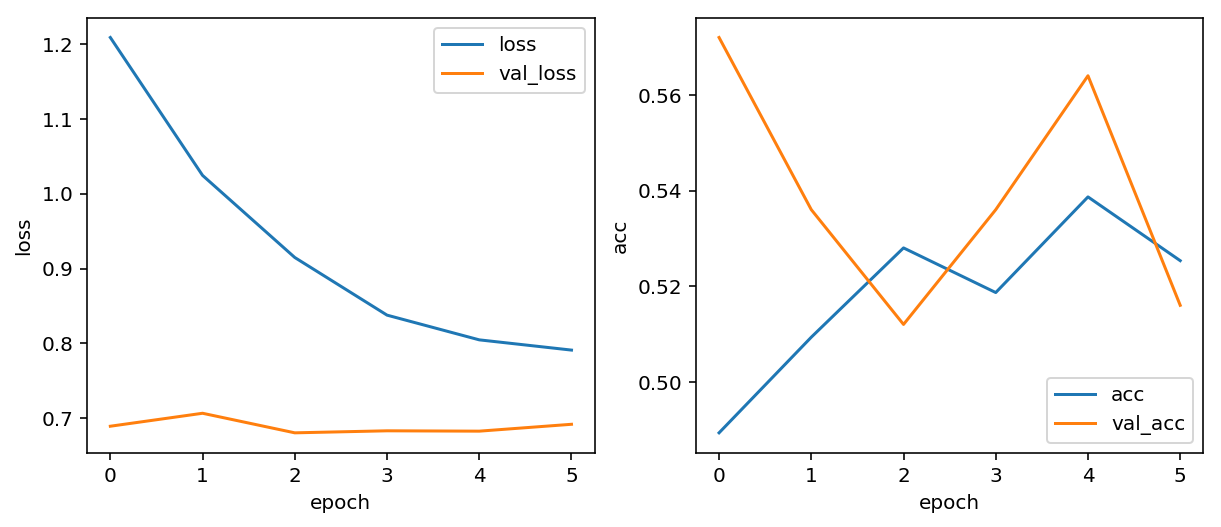

In [7]:
plotLossAndAccuracy(h.history)

In [8]:
model_conv.save_weights('w_conv-16.h5')

### 在测试集上预测图片的分类
是狗还是猫？

100%|██████████| 12500/12500 [00:29<00:00, 423.34it/s]


I am 52.07% sure this is a Dog


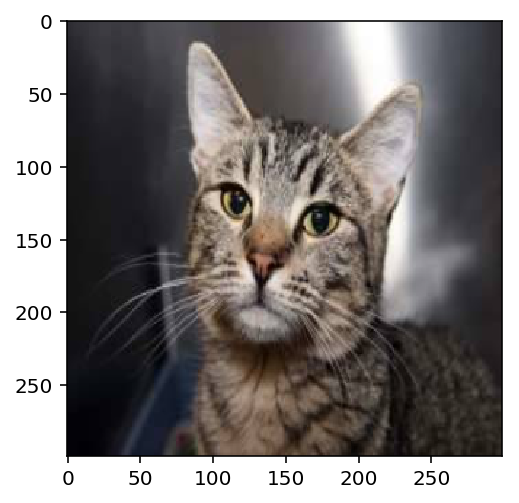

I am 50.94% sure this is a Dog


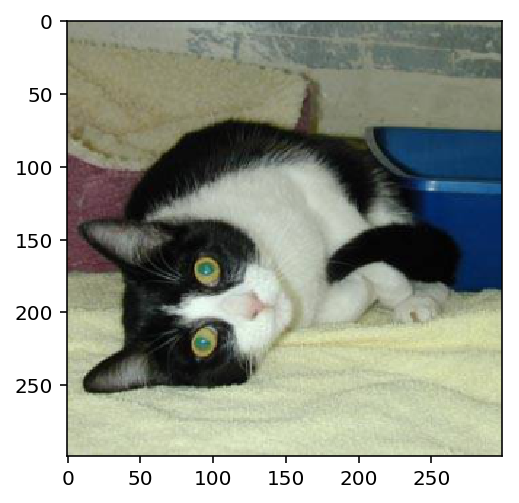

I am 51.84% sure this is a Dog


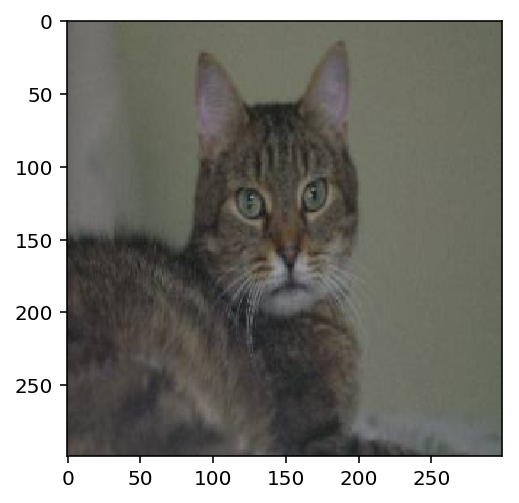

I am 71.22% sure this is a Dog


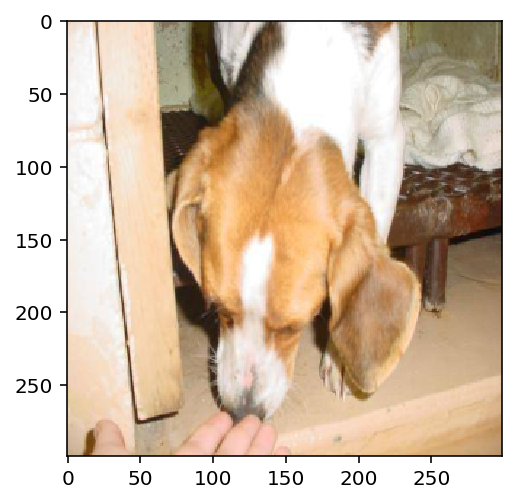

I am 53.79% sure this is a Dog


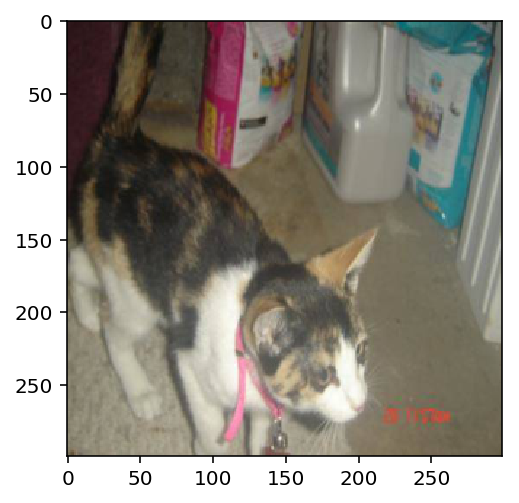

I am 58.05% sure this is a Cat


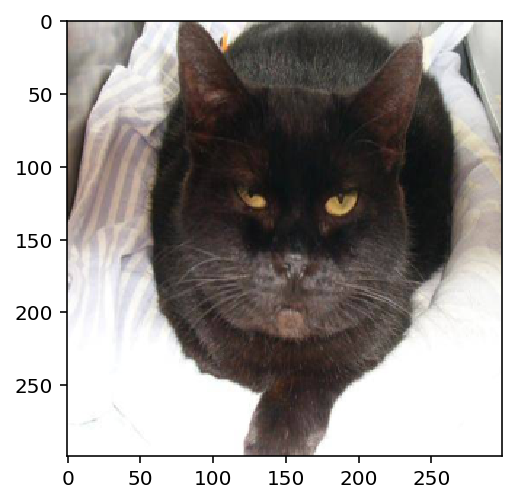

I am 67.10% sure this is a Dog


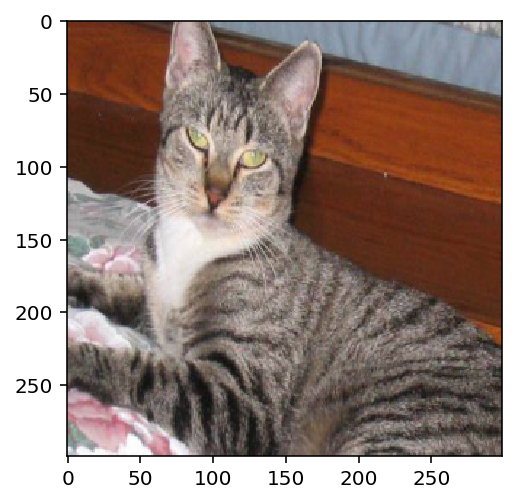

I am 62.59% sure this is a Dog


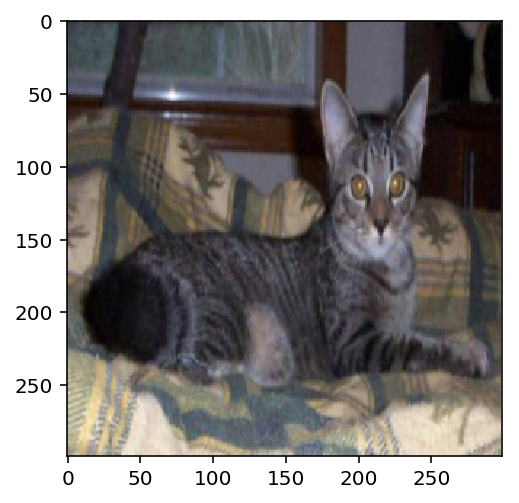

I am 58.12% sure this is a Dog


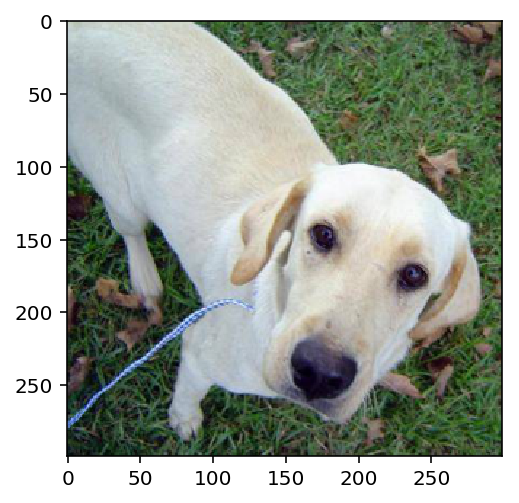

I am 53.40% sure this is a Cat


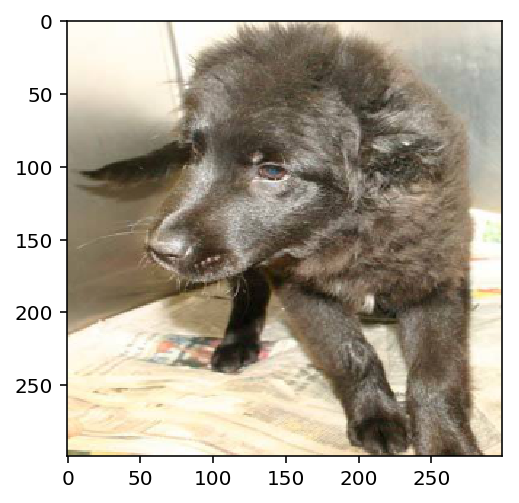

I am 56.65% sure this is a Dog


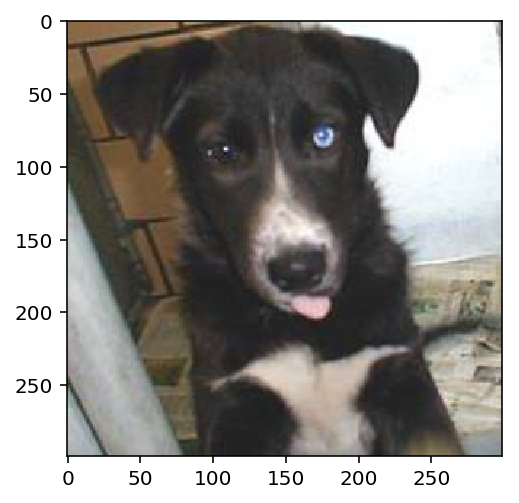

I am 72.71% sure this is a Dog


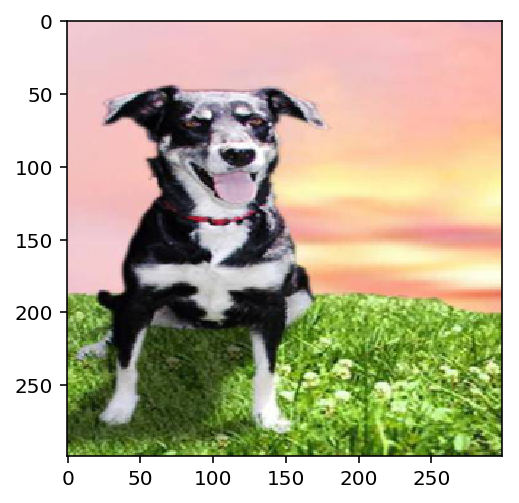

In [9]:
X_test, y_pred = predictOnTestSet(model_conv)
plotPredictions(X_test, y_pred)